In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


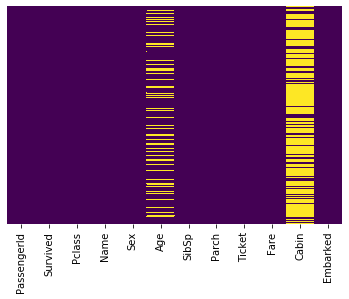

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

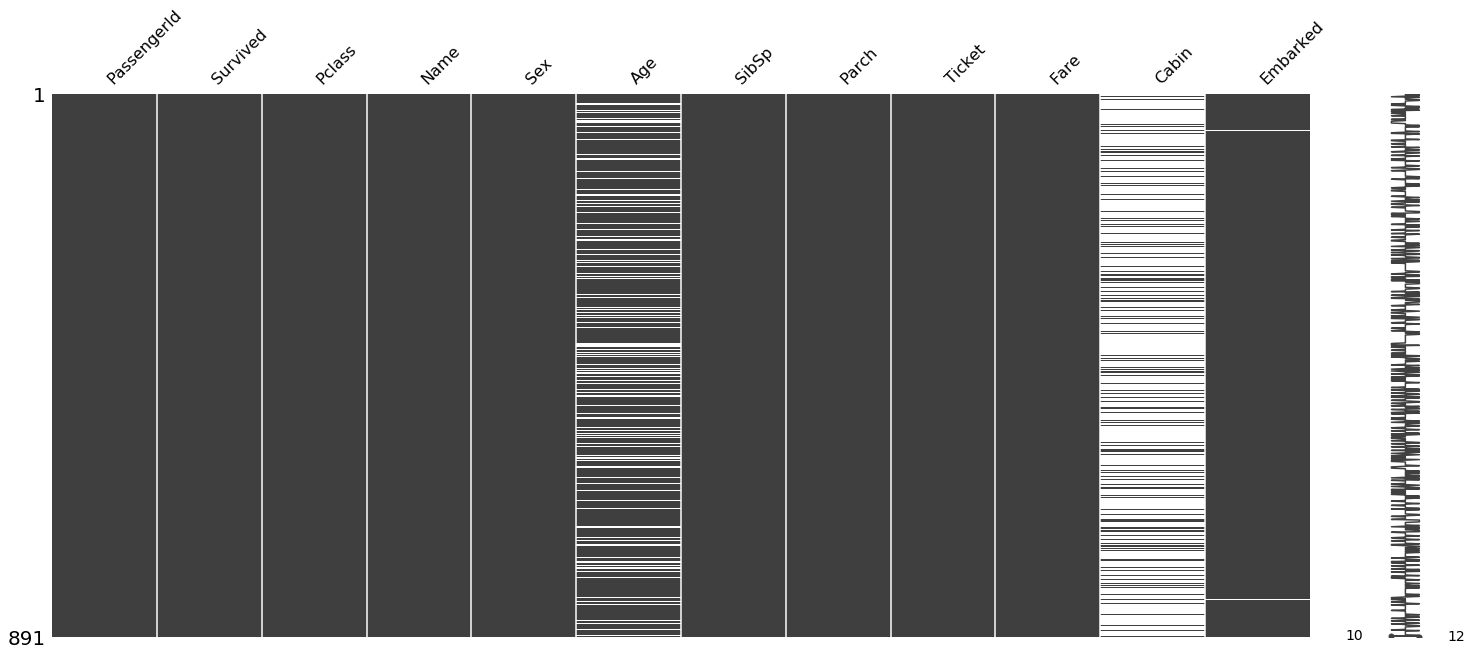

In [5]:
msn.matrix(train)

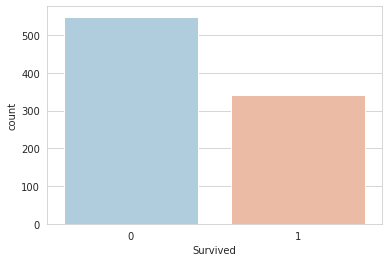

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

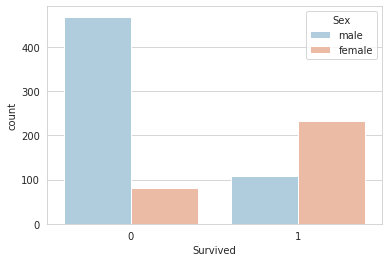

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
#Convert Embarked to Numerical 
#Convert Sex to Numerical 
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [10]:
train.Age.isnull().sum()

177

In [11]:
train.shape

(891, 12)

In [12]:
train.Cabin.isnull().sum()

687

In [16]:
train.Pclass.isnull().sum()

0

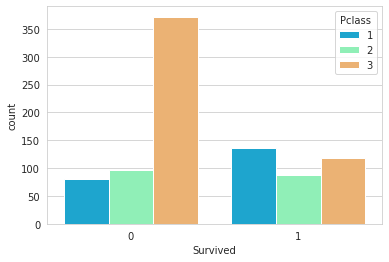

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

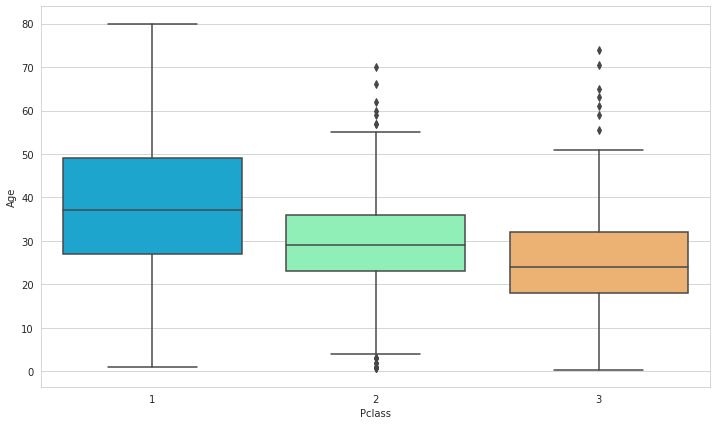

In [17]:
# Data cleaning, impute using median age
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='rainbow')

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [21]:
train.Age[0]

22.0

In [23]:
train.Pclass[0]

3

In [24]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [25]:
train.Age.isnull().sum()

0

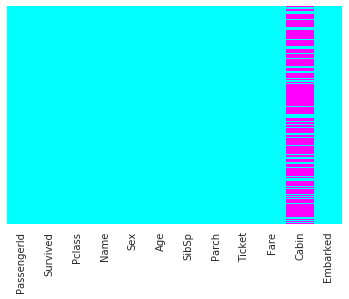

In [33]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='cool',xticklabels=True)

In [39]:
train.Embarked.isnull().sum()

2

In [37]:
train.drop('Cabin',axis=1,inplace=True)

In [40]:
#Convert categorical columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [47]:
pd.get_dummies(train['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [46]:
train.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [48]:
sex = pd.get_dummies(train['Sex'])
embark = pd.get_dummies(train['Embarked'])

In [58]:
type(sex)

pandas.core.frame.DataFrame

In [59]:
type(embark)

pandas.core.frame.DataFrame

In [56]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [57]:
train.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.25


In [60]:
#Combinining 3 dataframes together train, sex, embark
train = pd.concat([train,sex,embark],axis=1)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [63]:
train.drop('PassengerId', axis=1, inplace=True)

In [64]:
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.25,0,1,0,0,1


In [68]:
trains = train.copy()

In [69]:
#train.dropna(columns=['Embarked'],inplace=True)

In [62]:
from sklearn.model_selection import train_test_split

In [85]:
train.male.isnull().sum()

0

In [78]:
#If you do not want to have the data shuffled use (shuffle=False). random_state=43
#X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'male',
      # 'C', 'Q', 'S']]
#y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    shuffle=True , random_state =43)

In [79]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
597,3,49.0,0,0,0.0000,0,1,0,0,1
476,2,34.0,1,0,21.0000,0,1,0,0,1
102,1,21.0,0,1,77.2875,0,1,0,0,1
361,2,29.0,1,0,27.7208,0,1,1,0,0
230,1,35.0,1,0,83.4750,1,0,0,0,1


In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logmodel = LogisticRegression() # Create an instance of the model
logmodel.fit(X_train,y_train)  # Fit the model 

/home/mb/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
predictions = logmodel.predict(X_test) # Get predictions for the model

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test,predictions))
#https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       164
           1       0.73      0.60      0.66       104

    accuracy                           0.76       268
   macro avg       0.75      0.73      0.73       268
weighted avg       0.75      0.76      0.75       268



In [93]:
predict = pd.DataFrame(predictions)

In [94]:
predict.head()

,0
0,0
1,1
2,0
3,1
4,0


In [95]:
y_test.head()

770    0
853    1
144    0
141    1
261    1
Name: Survived, dtype: int64